#Decision Tree

Definiamo un DT per predirre a quale classe appartiene un fiore
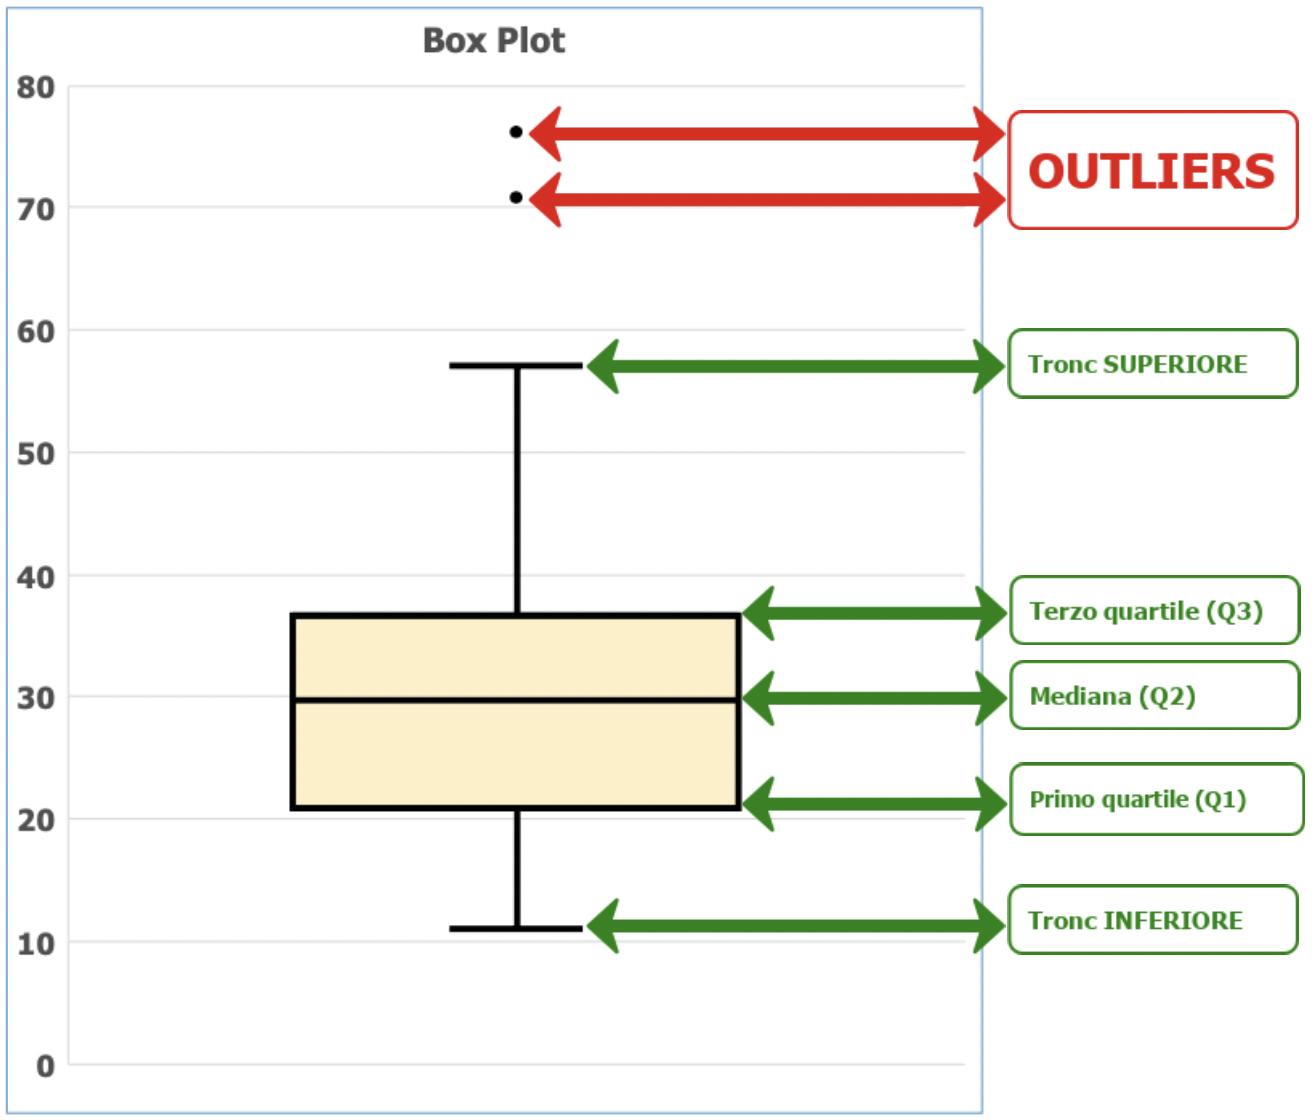

In [1]:
url = 'https://raw.githubusercontent.com/aleqrt/pcto-valentini/main/notebook/iris.csv'

## IRIS Dataset

   * il dataset può essere scaricato da qui: http://archive.ics.uci.edu/ml/datasets/Iris

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Data Understanding

In [3]:
iris = pd.read_csv(url)

In [4]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
#restituisce le prima 5 righe
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
#restituisce le ultime 5 righe

iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [7]:
iris.shape

(150, 5)

In [8]:
iris.size #righexcolonne

750

In [9]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [10]:
#stampa riepilogo del dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris['variety'] = iris['variety'].astype('category')

In [12]:
iris.dtypes

sepal.length     float64
sepal.width      float64
petal.length     float64
petal.width      float64
variety         category
dtype: object

In [13]:
iris['variety'].unique()

['Setosa', 'Versicolor', 'Virginica']
Categories (3, object): ['Setosa', 'Versicolor', 'Virginica']

In [14]:
iris['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: category
Categories (3, object): ['Setosa', 'Versicolor', 'Virginica']

In [15]:
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [16]:
#genera statistiche
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris['sepal.length'].mean()

5.843333333333334

In [18]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

<Axes: >

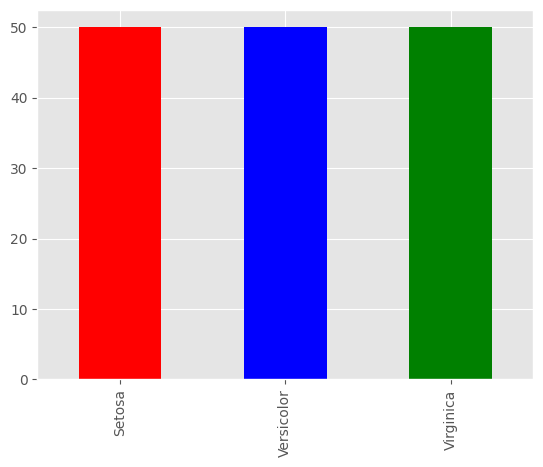

In [19]:
iris['variety'].value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'])

<Axes: >

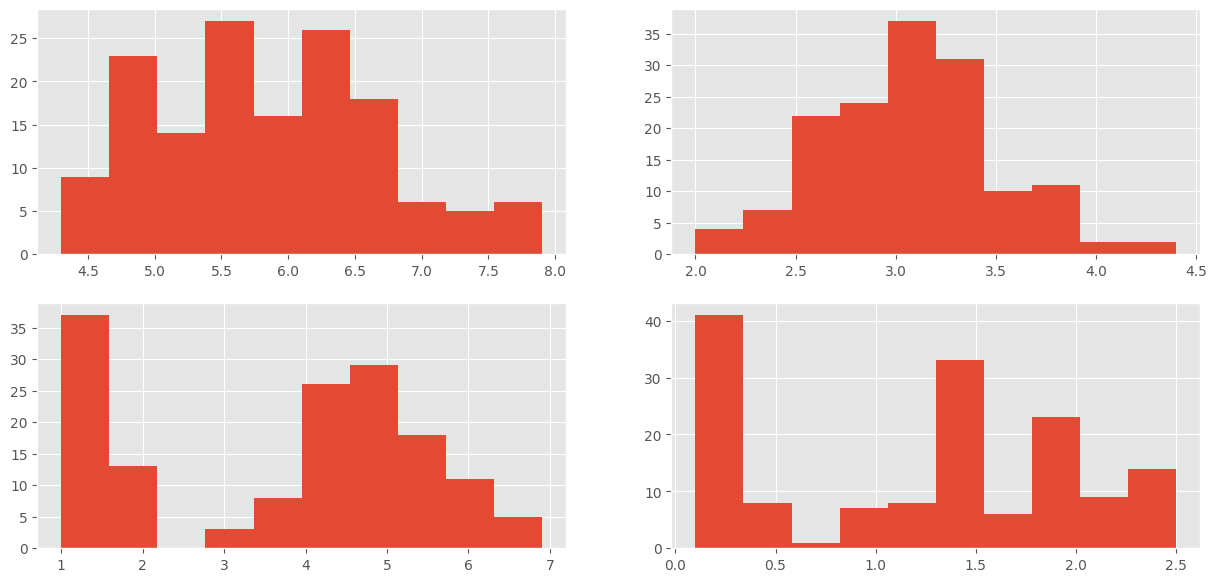

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (15, 7))
iris['sepal.length'].hist(ax = ax[0, 0]) #y id oggetti, x valore di sepal.lenght
iris['sepal.width'].hist(ax = ax[0, 1])
iris['petal.length'].hist(ax = ax[1, 0])
iris['petal.width'].hist(ax = ax[1, 1])

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

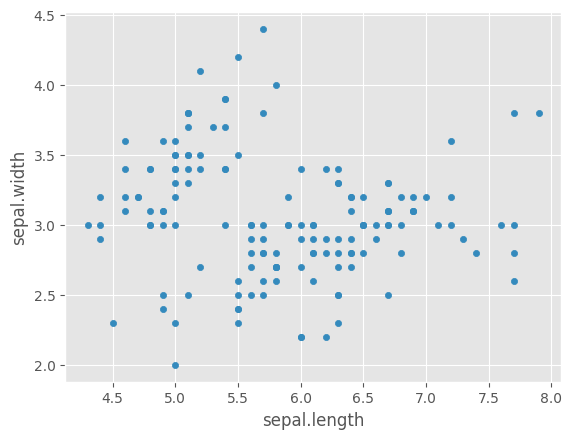

In [21]:
#L’asse x rappresenta la lunghezza del sepalo (sepal.length) e l’asse y rappresenta la larghezza del sepalo (sepal.width).
#Ogni punto nel grafico rappresenta un’osservazione nel DataFrame ‘iris’,
#con le coordinate x e y corrispondenti ai valori di sepal.length e sepal.width per quella osservazione.

iris.plot(kind = 'scatter', x = 'sepal.length', y = 'sepal.width')

Choosing Colormaps in Matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

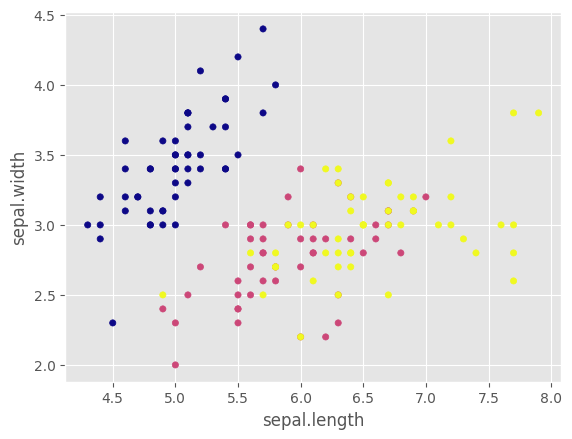

In [22]:
#assegnamo un colore different a ciascun tipo di fiore
encCol = iris['variety'].replace({'Setosa': 1, 'Versicolor': 2, 'Virginica': 3})
iris.plot(kind = 'scatter', x = 'sepal.length', y = 'sepal.width', c = encCol, cmap = 'plasma')

In [23]:
import seaborn as sn

Un boxplot visualizza la distribuzione di un insieme di dati, mostrando la mediana, i quartili e gli estremi dei dati.
I “baffi” del boxplot indicano la variazione dei dati e si estendono fino al minimo, mentre i punti al di fuori dei baffi rappresentano valori anomali (outlier).
È utile per confrontare le distribuzioni tra diversi gruppi di dati.

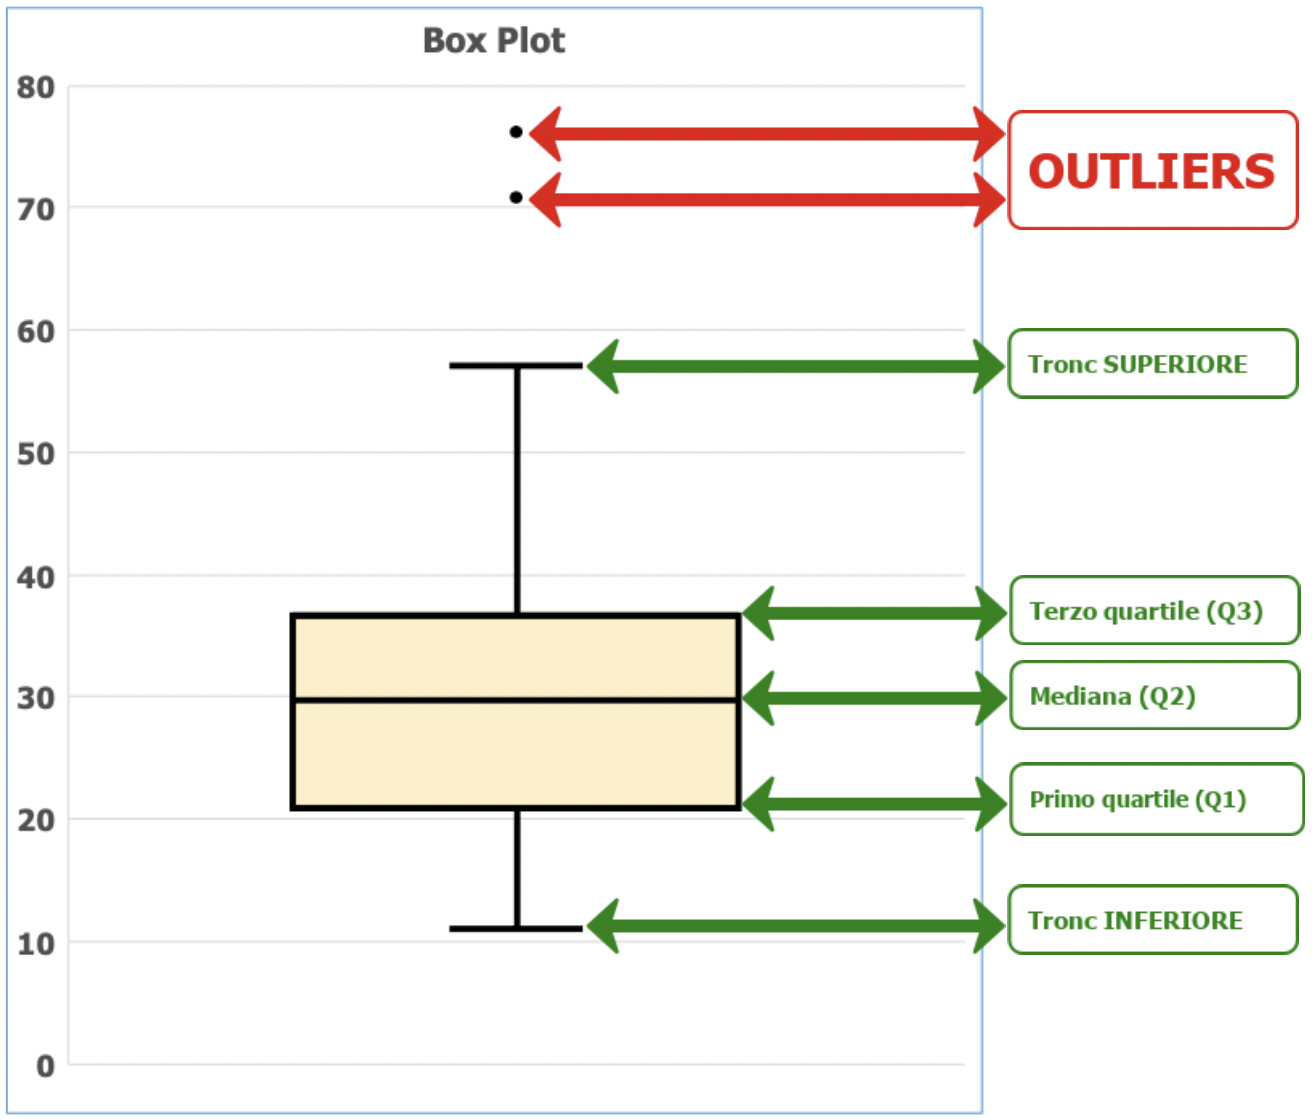

<Axes: xlabel='variety', ylabel='petal.width'>

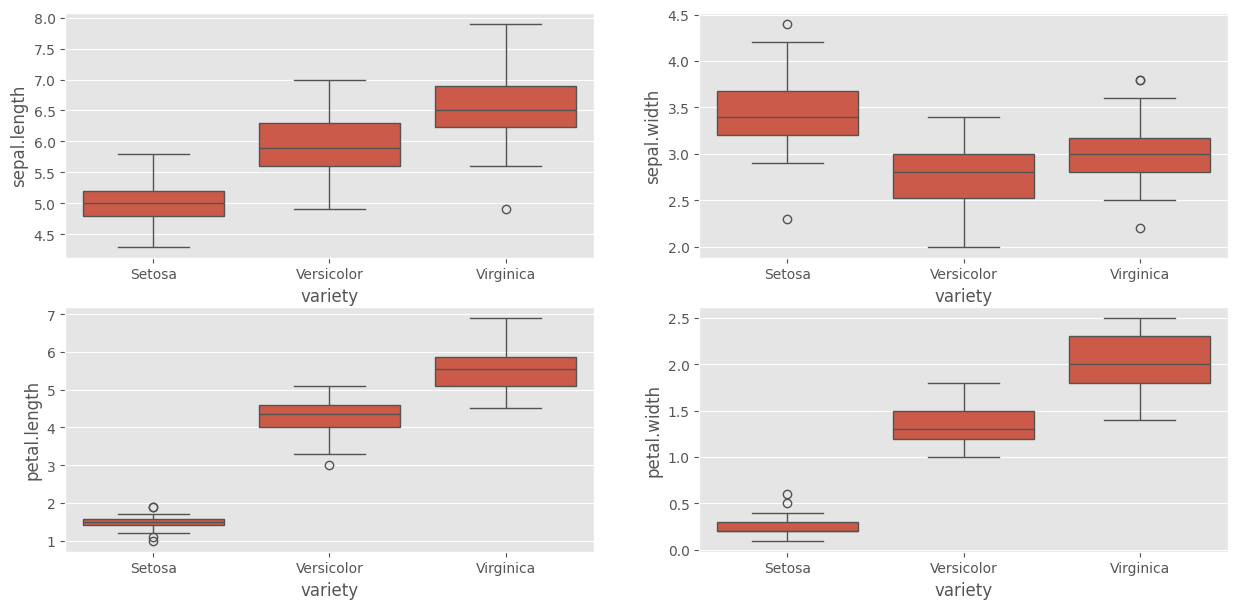

In [24]:
fig, ax = plt.subplots(2, 2, figsize = (15, 7))
sn.boxplot(y = 'sepal.length', x = 'variety', data = iris, ax = ax[0,0])
sn.boxplot(y = 'sepal.width', x = 'variety', data = iris, ax = ax[0,1])
sn.boxplot(y = 'petal.length', x = 'variety', data = iris, ax = ax[1,0])
sn.boxplot(y = 'petal.width', x = 'variety', data = iris, ax = ax[1,1])

### Data Preparation

In [25]:
iris['variety'].replace({'Setosa': 1, 'Versicolor': 2, 'Virginica': 3}, inplace = True)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Modeling

In [26]:
from sklearn.model_selection import train_test_split
import numpy as np

##### **Split the dataset**

In [27]:
X = np.array(iris.values)
Y = np.array(iris['variety'].values)

seed = 121
val_size = .2

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)

##### **Normalization**

In [28]:
from sklearn.preprocessing import MinMaxScaler

$ x_{new} = \frac {x - min(x)}{max(x) - min(x)} $

In [29]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

##### **Create models**

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
import seaborn as sb
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]

    box_labels = [f"{v1}".strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)


    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if title:
        plt.title(title)

In [32]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
predictions = model.predict(x_val)

In [33]:
print('Accuracy:', accuracy_score(y_val, predictions))

Accuracy: 1.0


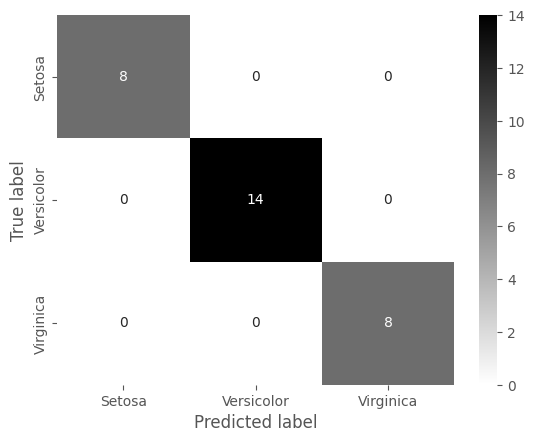

In [34]:
categories = ['Setosa', 'Versicolor', 'Virginica']
make_confusion_matrix(confusion_matrix(y_val, predictions), categories=categories, cmap='binary')

In [35]:
print('Classification report')
print(classification_report(y_val, predictions))

Classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

